$Introduction$

In this project I  investigated  appoinment records for Brasil public hospitals. The dataset is downloaded from Google and it includes some attributes of patients and state if the patients showed up to appointments. 

The dataset can be downloaded here: https://www.kaggle.com/datasets/joniarroba/noshowappointments?resource=download

Python tools used in this project to investigate the dataset include pandas, numpy and matplotlib.

In [1]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#read in data

df = pd.read_csv('KaggleV2-May-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


$Question$


1. Proportion of Patient's Gender that missed their scheduled appointment

2 The Neighbourhood with highest show/no show patients

3.The SMS_received proportion for show/no show and still 


In [3]:
#information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
df.duplicated().sum()

0

$Observations$
1. The dataset has 110527 samples with 14 attributes
2. The datasets does not have any missing value
3. There are no duplicates in the dataset
4. ScheduledDay and AppointmentDay are of type object intead of Datetime

In [7]:
#get columns that need to be converted to datatime datatype
to_date_type = [col for col in df.columns if 'Day' in col]
to_date_type

['ScheduledDay', 'AppointmentDay']

In [8]:
#convert columns 'ScheduledDay' and 'AppointmentDay' to datetime
for date_col in to_date_type:
    df[date_col] = pd.to_datetime(df[date_col])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

In [10]:
len(to_date_type)

2

In [11]:
#getting the year, month and weekday of 'ScheduledDay' and 'AppointmentDay' columns
for col in range(len(to_date_type)):
    df[to_date_type[col][:-3]+'_year'] = df[to_date_type[col]].dt.year
    df[to_date_type[col][:-3]+'_month'] = df[to_date_type[col]].dt.month
    df[to_date_type[col][:-3]+'_weekday'] = df[to_date_type[col]].dt.weekday

In [12]:
#samples of the df
df.sample(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Scheduled_year,Scheduled_month,Scheduled_weekday,Appointment_year,Appointment_month,Appointment_weekday
96508,7.879587e+12,5787721,F,2016-06-08 10:28:29+00:00,2016-06-08 00:00:00+00:00,1,JARDIM DA PENHA,0,0,0,0,0,0,No,2016,6,2,2016,6,2
49506,9.416235e+11,5701805,M,2016-05-16 11:02:59+00:00,2016-05-16 00:00:00+00:00,10,DO MOSCOSO,0,0,0,0,0,0,No,2016,5,0,2016,5,0
1276,8.655848e+14,5507702,F,2016-03-23 12:20:54+00:00,2016-04-29 00:00:00+00:00,15,JOANA D´ARC,0,0,1,0,0,1,Yes,2016,3,2,2016,4,4
66539,8.647144e+11,5675193,F,2016-05-09 13:18:59+00:00,2016-05-09 00:00:00+00:00,37,FORTE SÃO JOÃO,0,0,0,0,0,0,Yes,2016,5,0,2016,5,0
11148,5.144123e+11,5683008,M,2016-05-11 07:06:56+00:00,2016-05-11 00:00:00+00:00,26,RESISTÊNCIA,0,0,0,0,0,0,No,2016,5,2,2016,5,2
87388,1.535885e+13,5780854,F,2016-06-07 08:40:23+00:00,2016-06-07 00:00:00+00:00,33,UNIVERSITÁRIO,0,0,0,0,0,0,No,2016,6,1,2016,6,1
42930,4.466529e+14,5688565,M,2016-05-12 07:28:52+00:00,2016-05-12 00:00:00+00:00,0,TABUAZEIRO,0,0,0,0,0,0,No,2016,5,3,2016,5,3
72324,6.893657e+13,5690897,F,2016-05-12 10:52:50+00:00,2016-05-14 00:00:00+00:00,40,CARATOÍRA,0,1,0,0,0,0,No,2016,5,3,2016,5,5
85222,3.739694e+13,5790370,F,2016-06-08 18:28:35+00:00,2016-06-08 00:00:00+00:00,49,JARDIM CAMBURI,0,0,0,0,0,0,No,2016,6,2,2016,6,2
88180,8.511176e+14,5777499,F,2016-06-06 13:54:18+00:00,2016-06-06 00:00:00+00:00,53,JARDIM CAMBURI,0,0,0,0,0,0,No,2016,6,0,2016,6,0


In [13]:
df.Scheduled_month.unique()

array([ 4,  3,  2,  1,  5, 11, 12,  6], dtype=int64)

In [14]:
df.Scheduled_weekday.unique()

array([4, 2, 1, 3, 0, 5], dtype=int64)

In [15]:
df.Appointment_month.unique()

array([4, 5, 6], dtype=int64)

In [16]:
df.Appointment_weekday.unique()

array([4, 1, 0, 2, 3, 5], dtype=int64)

In [17]:
#replacing the digt in weekday and month colum to their corresponding day of the week and month
week_day = {0:'Monday',1:"Tuesday",2:"Wednesday",3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
month = {1:'Jan',2:"Feb",3:"Mar",4:'Apr',5:'May',6:'Jun',7:'Jul',8:"Aug",9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
df['Scheduled_weekday'] = df['Scheduled_weekday'].map(week_day)
df['Appointment_weekday'] = df['Appointment_weekday'].map(week_day)

df['Scheduled_month'] = df['Scheduled_month'].map(month)
df['Appointment_month'] = df['Appointment_month'].map(month)

In [18]:
df.sample(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Scheduled_year,Scheduled_month,Scheduled_weekday,Appointment_year,Appointment_month,Appointment_weekday
21890,4.176779e+12,5660335,F,2016-05-04 16:09:37+00:00,2016-05-06 00:00:00+00:00,60,GRANDE VITÓRIA,0,1,1,0,0,0,No,2016,May,Wednesday,2016,May,Friday
68401,4.267925e+12,5717699,F,2016-05-19 08:16:21+00:00,2016-05-19 00:00:00+00:00,33,MARIA ORTIZ,0,0,0,0,0,0,No,2016,May,Thursday,2016,May,Thursday
39662,8.675758e+10,5692294,F,2016-05-12 14:54:42+00:00,2016-05-19 00:00:00+00:00,89,BENTO FERREIRA,0,0,0,0,0,0,Yes,2016,May,Thursday,2016,May,Thursday
13419,2.271580e+12,5674643,M,2016-05-09 11:32:46+00:00,2016-05-09 00:00:00+00:00,57,ILHA DE SANTA MARIA,0,0,0,0,0,0,No,2016,May,Monday,2016,May,Monday
37133,3.138290e+14,5550843,M,2016-04-06 12:33:13+00:00,2016-05-09 00:00:00+00:00,5,JABOUR,0,0,0,0,0,0,Yes,2016,Apr,Wednesday,2016,May,Monday


In [19]:
#drop column that are not needed
df.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'], axis=1, inplace=True)
df.sample(5)

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Scheduled_year,Scheduled_month,Scheduled_weekday,Appointment_year,Appointment_month,Appointment_weekday
33868,F,27,GURIGICA,0,0,0,0,0,0,No,2016,May,Monday,2016,May,Monday
33255,F,28,SANTA MARTHA,0,0,0,1,0,0,Yes,2016,Apr,Thursday,2016,May,Thursday
86117,M,56,JARDIM CAMBURI,0,0,0,0,0,0,No,2016,Jun,Tuesday,2016,Jun,Tuesday
67585,M,0,SÃO PEDRO,0,0,0,0,0,0,Yes,2016,May,Friday,2016,May,Tuesday
26690,F,48,PARQUE MOSCOSO,0,1,0,0,0,1,No,2016,Apr,Friday,2016,May,Tuesday


In [20]:
#descipetive statistics of numeric columns in the dataframe
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Scheduled_year,Appointment_year
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.0
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,2015.999439,2016.0
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.023678,0.0
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,2016.0
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,2016.0
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,2016.0
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2016.000000,2016.0
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,2016.000000,2016.0


In [21]:
#descriptive statistics of object columns
df.select_dtypes(include='object').describe()

,Gender,Neighbourhood,No-show,Scheduled_month,Scheduled_weekday,Appointment_month,Appointment_weekday
count,110527,110527,110527,110527,110527,110527,110527
unique,2,81,2,8,6,3,6
top,F,JARDIM CAMBURI,No,May,Tuesday,May,Wednesday
freq,71840,7717,88208,67421,26168,80841,25867


Observations
1. The average age of patients is 37
2. 25% of the patients are 18years, 50% are 37 years and 75% are 55 years
3. The minimum age is -1 (which should be an error) while the maximun age is 115years
4. Some patients schedule their appointment in 2015
5. All patients actual appointment is done in 2016
6. There are more female patients than male patients in the dataset
7. The hospital in JARDIM CAMBURI is mostly used by patients
8. The month with highest set up of patient's appointment is May
9. Patients schedule appointment on Tuesday than every other days of the week.

Note: minimum age will be replaced with the average age

In [22]:
#get age columns with value of -1
df.query('Age == -1')

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Scheduled_year,Scheduled_month,Scheduled_weekday,Appointment_year,Appointment_month,Appointment_weekday
99832,F,-1,ROMÃO,0,0,0,0,0,0,No,2016,Jun,Monday,2016,Jun,Monday


In [23]:
#replace age -1 with 37- the average age
df['Age'].replace(-1, 37, inplace=True)
df.query('Age == -1')

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Scheduled_year,Scheduled_month,Scheduled_weekday,Appointment_year,Appointment_month,Appointment_weekday


Exploratory data Analysis

In [24]:
df.groupby(["Gender",'No-show'])['Gender'].count().unstack('No-show')

No-show,No,Yes
Gender,,
F,57246,14594
M,30962,7725


observation: there are more female that showed up for appointment than male in the dataset

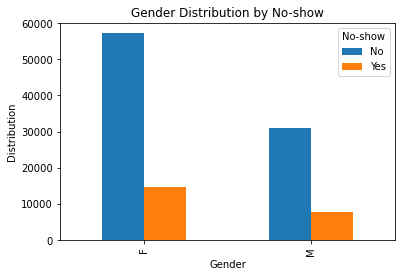

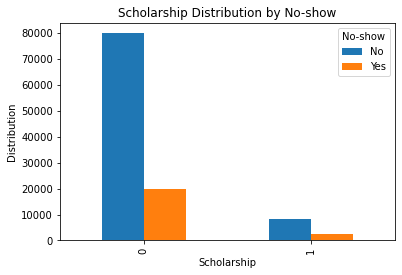

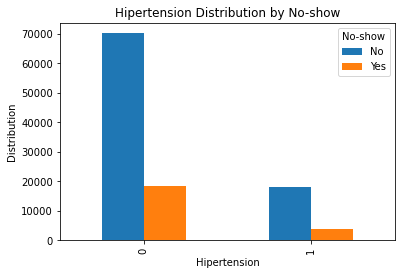

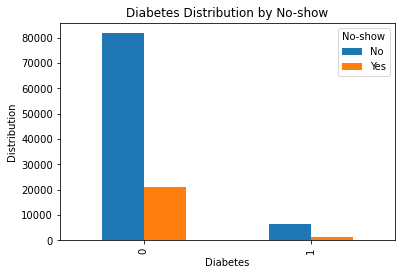

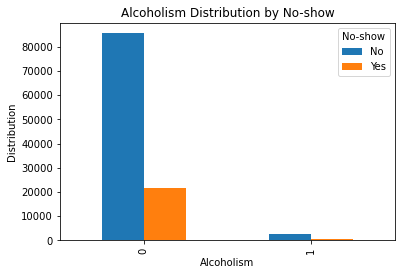

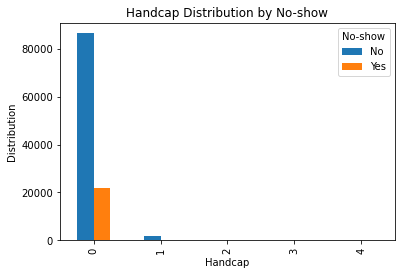

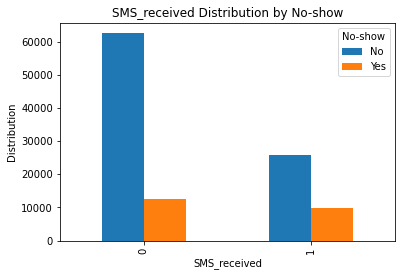

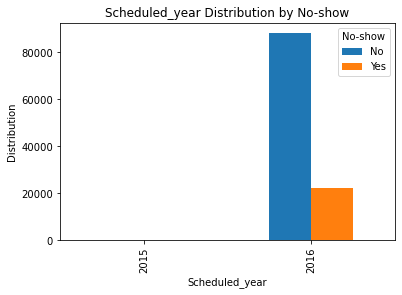

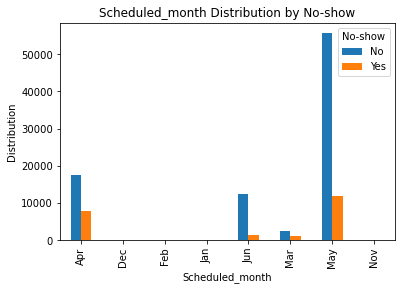

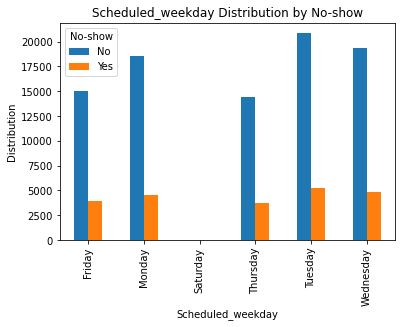

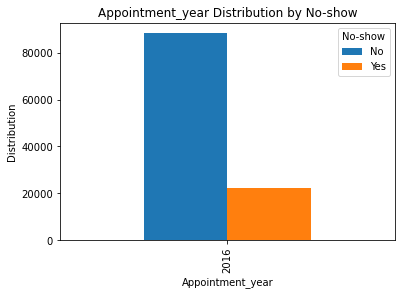

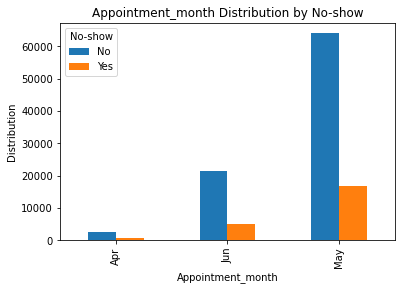

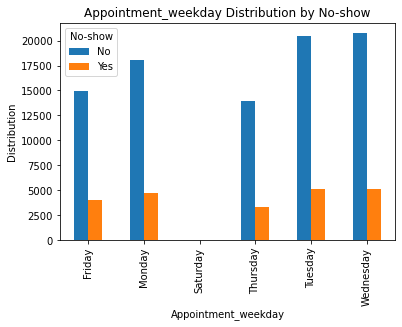

In [25]:
#bar chart for all columns in the dataset grouped by No-show columns
for col in df.drop(['Age','Neighbourhood'], axis=1):
    try:
        df.groupby([col,'No-show'])[col].count().unstack('No-show').plot(kind='bar', xlabel=col, 
                                                                     ylabel='Distribution', title=col + ' Distribution by No-show')
        plt.show()
    except:
        pass

In [ ]:
#top 10 hospital  location

In [52]:
def plot_bar(col, kind='bar', title=None,xlabel=None, ylabel=None):
    col.plot(kind=kind)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [53]:
#top 10 hospital  location
top_ten_Neighbourhood = df['Neighbourhood'].value_counts().sort_values().tail(10)

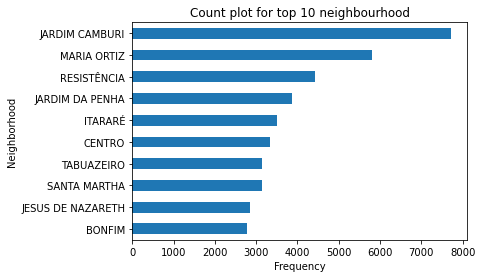

In [54]:
#top 10 hospital  location visualization
plot_bar(top_ten_Neighbourhood, kind='barh', title = 'Count plot for top 10 neighbourhood', xlabel='Frequency',
        ylabel='Neighborhood')

JARDIM CAMBURI is the neighourhood with that has the highest registration for patients

In [55]:
#top 10  neighbourhood distribution for show / no-show patients?
neighbour_list = list(df['Neighbourhood'].value_counts().sort_values().tail(10).index)

no_show_neig = df[['Neighbourhood', 'No-show']].query('Neighbourhood in {}'.format(neighbour_list)
                                      ).groupby(["Neighbourhood",'No-show'])['Neighbourhood'].count().unstack('No-show')

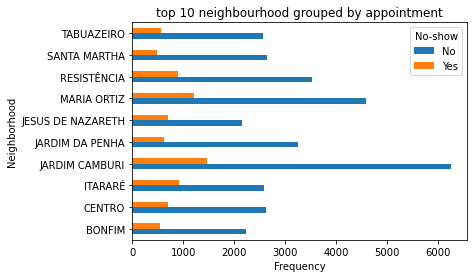

In [57]:
plot_bar(no_show_neig, kind='barh', title='top 10 neighbourhood grouped by appointment', xlabel='Frequency',
        ylabel='Neighborhood')

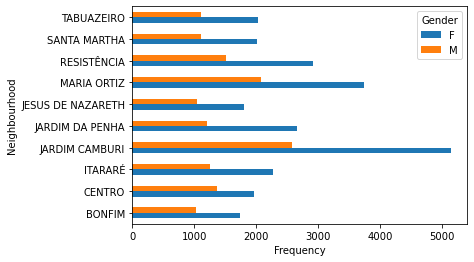


-----------------------------------------------------------------------------------------



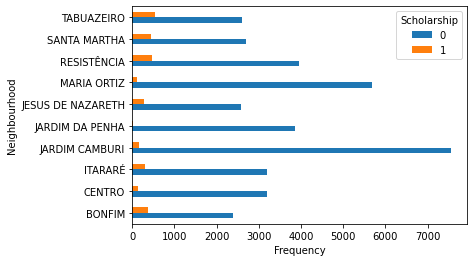


-----------------------------------------------------------------------------------------



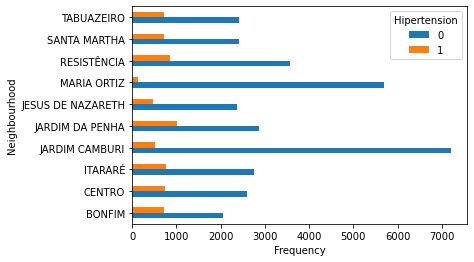


-----------------------------------------------------------------------------------------



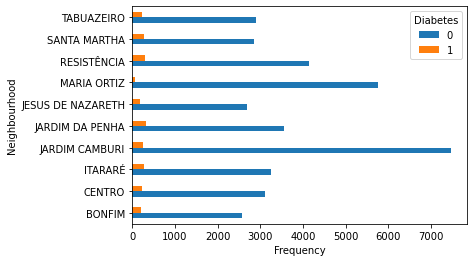


-----------------------------------------------------------------------------------------



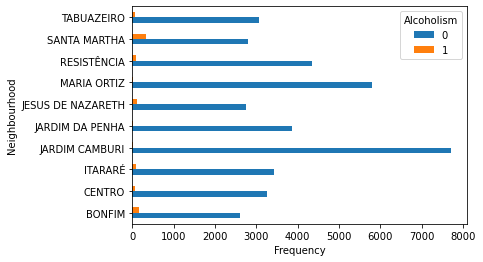


-----------------------------------------------------------------------------------------



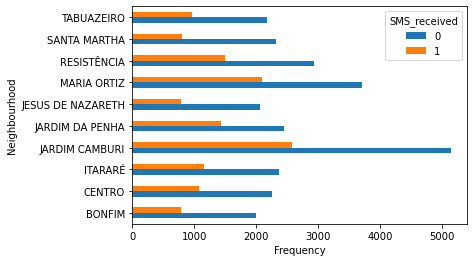


-----------------------------------------------------------------------------------------



In [45]:
#top 10  neighbourhood distribution for categorical colums in the dataset
cat_col = ['Gender','Scholarship','Hipertension','Diabetes','Alcoholism','SMS_received']
to_10_neighbour_df = df.query('Neighbourhood in {}'.format(neighbour_list))
for col in to_10_neighbour_df.columns:
    if col in cat_col:
        to_10_neighbour_df.groupby([col,"Neighbourhood"])['Neighbourhood'].count().unstack(col).plot(kind='barh')
        
        plt.xlabel('Frequency')
        plt.show()
        
        print('\n-----------------------------------------------------------------------------------------\n')
                                                                                               

Observation
1. Most patients Schedule their appointment in May. 
2. There is no appointment scheduled in July, August, September and October
3. Most patients Schedule their appointment on Tusesday.  There is no appointment scheduled on Sunday.
4. Patient go for their appointment only in April, May and June.  
5. Most patients go for their appointment on Wednesday. There is no appointment scheduled on Sunday.
6. Patients uses hospital located at JARDIM CAMBURI than hosipital located at any other location
7. Patients that uses hospital in JARDIM DA PENHA are patients with no scholarship
8. Patients that uses hosipital located in MARIA ORTIZ, JARDIM DA PENHA and JARDIM CAMBURI are patients that don't take alcohol

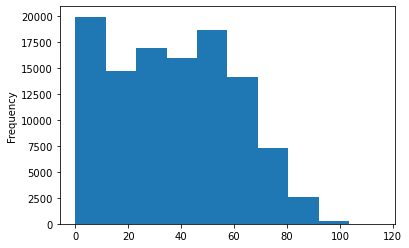

In [114]:
df.Age.plot(kind='hist');

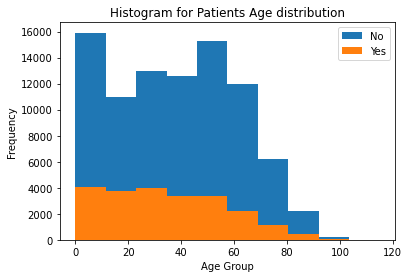

In [59]:
#Age distribution for show /No show patients
df['Age'][df['No-show'] == 'No'].plot(kind='hist', label='No')
df['Age'][df['No-show'] == 'Yes'].plot(kind='hist', label='Yes')
plt.legend()
plt.title('Histogram for Patients Age distribution')
plt.xlabel('Age Group');

observation: Patients between Age does not determine if a patients will show for their aopointment or not

In [132]:
df['Age'][df['Age'] == 0].count()

3539

Observation

The age of  most patients in the dataset lies between 0 and 60. there is no outlier

In [61]:
df.groupby(["No-show",'Hipertension'])['Gender'].count().unstack('Hipertension')

Hipertension,0,1
No-show,,
No,70179,18029
Yes,18547,3772


patients with hypertention tends to show up for their appointment than patiens without hypertention

In [62]:
df.groupby(["No-show",'Diabetes'])['Gender'].count().unstack('Diabetes')

Diabetes,0,1
No-show,,
No,81695,6513
Yes,20889,1430


observation: patients with Diabetes also tends to show up for apointment. It can be conluded that patients battling with one  sickness or the other takes their appointment serious

In [126]:
df.groupby(["Gender",'Alcoholism'])['Gender'].count().unstack('Alcoholism')

Alcoholism,0,1
Gender,,
F,70617,1223
M,36550,2137


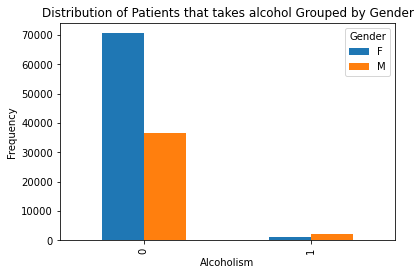

In [49]:
#Alcoholic patients distribution for patients gender
df.groupby(["Gender",'Alcoholism'])['Gender'].count().unstack('Gender').plot(kind='bar')
plt.title('Distribution of Patients that takes alcohol Grouped by Gender')
plt.ylabel('Frequency');

observation: Male patients take alcohol than femae patients

In [129]:
df.groupby(["Gender",'SMS_received'])['Gender'].count().unstack('SMS_received')

SMS_received,0,1
Gender,,
F,47638,24202
M,27407,11280


Observation

1. The number of female patients that received SMS are twice the number of male patients that receive SMS
2. There are more Male patients that takes alcohol than female patients

In [140]:
#percentage of patients that received SMS and didn't show up for their apartment
(df[(df['SMS_received'] == 1) & (df['No-show'] == 'Yes')].shape[0]/df.shape[0]) *100

8.852135677255331

In [144]:
#percentage of patients that did not received SMS and didn't show up for their apartment
(df[(df['SMS_received'] == 0) & (df['No-show'] == 'Yes')].shape[0]/df.shape[0]) *100

11.341120269255477

In [143]:
#percentage of patients that received SMS and showed up for their apartment
(df[(df['SMS_received'] == 1) & (df['No-show'] == 'No')].shape[0]/df.shape[0]) *100

23.250427497353588

In [142]:
#percentage of patients that didn't receive SMS and  showed up for their apartment
(df[(df['SMS_received'] == 0) & (df['No-show'] == 'No')].shape[0]/df.shape[0]) *100

56.5563165561356

$Conclusion$/

Inorder to investigate the dataset, I cleaned the data, added new feature to the data (feature engineering)  and also compared attributes in the dataset with each other.

My major findings are:

1. The average age of patients is 37
2. 25% of the patients are 18yeard, 50% are 37 years and 75% are 55 yearsFemale Gender misses their scheduled appointment than male
3. There are more female patients than male patints in the dataset
4. The hospital in JARDIM CAMBURI is mostly used by patients
5. The month with highest set up of patients appointment is May
6. Patients that uses hospital in JARDIM DA PENHA are patients with no scholarship
7. Patients that uses hosipital located in MARIA ORTIZ, JARDIM DA PENHA and JARDIM CAMBURI are patients that don't take alcohol
8. There are Male patients that takes alcohol than female patients
9. 56.56% that didn't receive SMS go for their actual appointments with 9% of the patients who received SMS and still mised their appointment. 
10. Patients that missed their appointmments are mostly female


for future work I would like to get do a geographocal analysis and check if patients tends not to miss their appointment if the hospital is close to their neighourhood. 

Why did most patient fix appointment with hospital in JARDIM CAMBURI neighbourhood.. is it that JARDIM CAMBURI has qualified doctors and ultra-mordern health facilities.

Limitation:
Finding the best way to handle the missing age, incase I would like to build a predictive model and removing dataset would like lead to loss of information for the model

Data Imbalance: There are more female gender in the dataset which make most of the inside in the dataset be associated to female patients.
